<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-in-log-space!" data-toc-modified-id="Model-in-log-space!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model in log-space!</a></span></li><li><span><a href="#Rationale-for-testing-EMH" data-toc-modified-id="Rationale-for-testing-EMH-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Rationale for testing EMH</a></span></li><li><span><a href="#Random-walks" data-toc-modified-id="Random-walks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random walks</a></span></li><li><span><a href="#ADF" data-toc-modified-id="ADF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ADF</a></span></li><li><span><a href="#Hurst" data-toc-modified-id="Hurst-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hurst</a></span></li><li><span><a href="#Variance-ratio" data-toc-modified-id="Variance-ratio-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Variance-ratio</a></span></li><li><span><a href="#Ljung-box-test--for-autocorrelation" data-toc-modified-id="Ljung-box-test--for-autocorrelation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ljung-box test  for autocorrelation</a></span></li><li><span><a href="#Half-life-of-mean-reversion" data-toc-modified-id="Half-life-of-mean-reversion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Half-life of mean reversion</a></span></li></ul></div>

# Model in log-space!

According to the random walk hypothesis, asset prices follow a geometric random walk. Although market efficiency suggests that a geometric random walk
may be appropriate for modeling price data, for the analyst, the important
issue is whether or not observed prices behave like observations from a geometric random walk. Hence, a large number of statistical tests of the random
walk model have been proposed.  


It is worth noting that, although the term “random walk” refers to
the asset log-prices, tests of the random walk model are typically based on the
properties of the log-returns, which are the increments corresponding to the
log-prices. Thus, these tests are designed to detect statistical relationships in
the log-returns of an asset; such relationships would contradict the random
walk hypothesis.

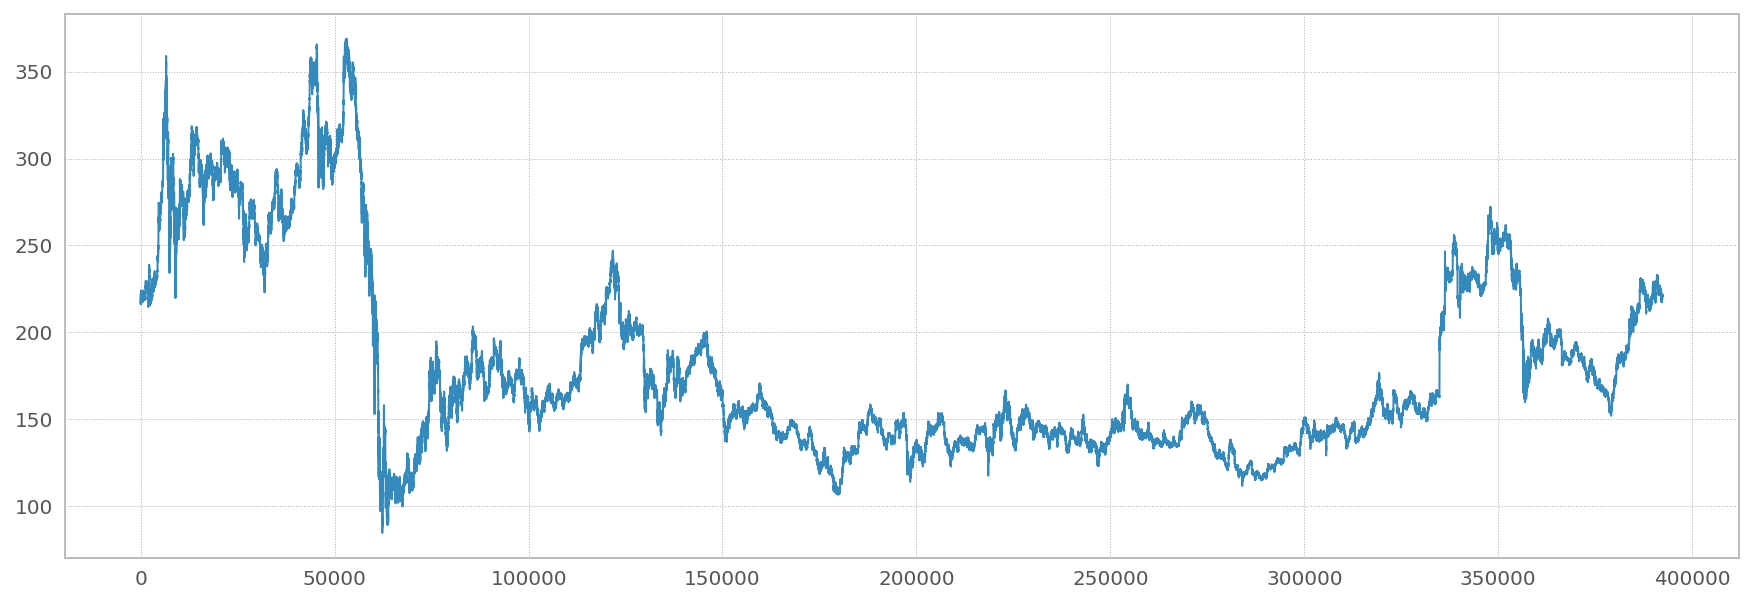

In [1]:
gazp = pd.read_csv("gazp.csv", parse_dates=["Date"])
ts = gazp.sort_values("Date")["Close"].values
plt.plot(ts);

# Rationale for testing EMH


> Mean reversion and stationarity are two equivalent ways of looking at the
same type of price series, but these two ways give rise to two different statistical tests for such series. 
>
> Mean-reversion:
> - ADF

> The mathematical description of a stationary price series is that
the variance of the log of the prices increases slower than that of a geometric random walk. That is, their variance is a sublinear function of time,
rather than a linear function  
>
> Stationarity test (unit root tests)
> - Hurst exponent
> - Variance ratio test


# Random walks

> All random walks are non-stationary, because for processes:
> - without trend: variance increases  
> - with trend: both mean and variance increase 
> - random walks are said to be unit-root processes


> Definition:  
> The process {Yₜ : t = 1, 2, . . .} is said to be weakly stationary if
> 1. E(Yₜ ) = μ for all t = 1, 2, . . ., for some constant μ.
> 2. Var(Yₜ ) = σ 2 for all t = 1, 2, . . ., for some constant σ 2 > 0.
> 3. Cov(Yₜ , Yₛ) = γ(|t − s|) for all t, s = 1, 2, . . ., for some function γ(·).

- RW1:
    - increment generating process is i.i.d. All moments are identical and independent
    
- RW2:
    - Increment generating process is not identically distributed, but indepependent. µ and 𝜎 are constant, but higher moments may differ.    
    
- RW3:
    - Assumptions are further relieved. Increments are not identically distributed and independent, but uncorrelated, Cov(x,y)=0 (note, uncorrellated means **lack of linear dependence**, and does not forbid non-linear relations).
    - RW3 Tests: Ljung-Box, Variance-ratio test   
    
> Tests for random walks aim to disproof random walk (unit root) trough the existence of serial correlation (Ljung-Box) or diminishing variance (Hurst, Variance-Ratio test)  



# ADF

ADF introduction in Chan is incorrect (diff between price and mean is missing)  
For better price path specification see   
https://mathtopics.wordpress.com/2013/01/07/ornstein-uhlenbeck-process/   
(which is also contrary to commonly accepted sign in front of y(t-1))

In [2]:
from arch.unitroot import ADF

ADF(np.log(ts), trend="c").summary()

Test Statistic,-2.603
P-value,0.092
Lags,90


# Hurst

Log-transformation occurs inside of the `hurst` function

In [3]:
from hurst import hurst

hurst(ts,2)

Price lags of [2] are included


0.4882328858596473

# Variance-ratio

In [4]:
from arch.unitroot import VarianceRatio

VarianceRatio(np.log(ts))

Test Statistic,-2.047
P-value,0.041
Lags,2


# Ljung-box test  for autocorrelation

In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# H₀ : datapoints are independent (i.e. there is no autocorrelation)
acorr_ljungbox(np.log(ts), lags=10, boxpierce = True, return_df=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,3.923646e+05,0.0,3.923616e+05,0.0
2,7.847057e+05,0.0,7.846987e+05,0.0
3,1.177024e+06,0.0,1.177012e+06,0.0
4,1.569319e+06,0.0,1.569301e+06,0.0
5,1.961590e+06,0.0,1.961565e+06,0.0
6,2.353838e+06,0.0,2.353805e+06,0.0
7,2.746062e+06,0.0,2.746020e+06,0.0
8,3.138263e+06,0.0,3.138211e+06,0.0
9,3.530440e+06,0.0,3.530377e+06,0.0
10,3.922594e+06,0.0,3.922519e+06,0.0


In [8]:
from arch import unitroot
dir_(unitroot)

['ADF',
 'DFGLS',
 'EngleGrangerTestResults',
 'KPSS',
 'PhillipsPerron',
 'VarianceRatio',
 'ZivotAndrews',
 '_engle_granger',
 '_phillips_ouliaris',
 '_shared',
 'auto_bandwidth',
 'cointegration',
 'critical_values',
 'engle_granger',
 'unitroot']

# Half-life of mean reversion

https://mathtopics.wordpress.com/2013/01/07/ornstein-uhlenbeck-process/  
(flip the sign in front of 𝑋 and µ)   

Even formally non-stationary TS may be traded with meaningful half life of mean reversion

In [21]:
from scipy.stats import linregress
deltas = np.diff(ts)
slope = linregress(ts[:-1],deltas)[0]
print(-np.log(2)/slope)

26902.266567482526


In [24]:
# %%writefile halflife.py
# from scipy.stats import linregress
# import numpy as np

# def hl(ts):
#     deltas = np.diff(ts)
#     slope = linregress(ts[:-1],deltas)[0]
#     return -np.log(2)/slope

# # hl(ts)

Writing halflife.py
